<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado de Análisis de datos y Machine Learning en Python</h1>


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

In [ ]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.0 kB/s 
     |████████████████████████████████| 438 kB 85.5 MB/s 
     |████████████████████████████████| 1.6 MB 42.5 MB/s 
     |████████████████████████████████| 5.8 MB 36.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [ ]:
!pip install --upgrade tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.8 kB/s 


#### Problema 1:
Implementar el modelo de regresión logística en el Dataset ***titanic.csv*** para predecir que personas hubieran sobrevivido (Usar Sklearn).
 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/titanic.csv')

In [3]:
data.shape

(891, 12)

In [4]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
212,213,0,3,"Perkin, Mr. John Henry",male,22.0,0,0,A/5 21174,7.2500,NaN,S
817,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
768,769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,NaN,Q
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S


In [6]:
data.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis=1, inplace=True)

In [7]:
data.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
67,0,3,male,19.0,0,0,8.1583
429,1,3,male,32.0,0,0,8.0500
744,1,3,male,31.0,0,0,7.9250
408,0,3,male,21.0,0,0,7.7750
560,0,3,male,NaN,0,0,7.7500


In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [10]:
data.loc[data['Survived']==1,['Age']]=imp.fit_transform(data.loc[data['Survived']==1,['Age']])
data.loc[data['Survived']==0,['Age']]=imp.fit_transform(data.loc[data['Survived']==0,['Age']])

In [11]:
data.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
dtype: bool

In [12]:
data=pd.get_dummies(data, drop_first=True)

In [13]:
data['Family_size']=data['SibSp'] + data['Parch']
data.drop(['SibSp', 'Parch'] ,axis=1, inplace=True)
data.head()

,Survived,Pclass,Age,Fare,Sex_male,Family_size
0,0,3,22.0,7.2500,1,1
1,1,1,38.0,71.2833,0,1
2,1,3,26.0,7.9250,0,0
3,1,1,35.0,53.1000,0,1
4,0,3,35.0,8.0500,1,0


In [14]:
X=data.iloc[:,1:]
y=data.iloc[:,0]

In [15]:
X.shape

(891, 5)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, cross_val_score , validation_curve

In [17]:
X.head()

,Pclass,Age,Fare,Sex_male,Family_size
0,3,22.0,7.2500,1,1
1,1,38.0,71.2833,0,1
2,3,26.0,7.9250,0,0
3,1,35.0,53.1000,0,1
4,3,35.0,8.0500,1,0


In [18]:
model = Pipeline((
      ('scale', StandardScaler()),  ('poly', PolynomialFeatures(degree=2)), ('logreg', LogisticRegression(C=50, solver='liblinear'))
))

In [19]:
scores = cross_val_score(model, X, y, cv=7)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.818 +/- 0.026


In [20]:
params= np.hstack([np.arange(0.01,1.0,0.03), np.linspace(1.1,100,20)])
train_score, test_score = validation_curve(
  model,
  X, 
  y,
  param_name='logreg__C',
  param_range=params,
  scoring='accuracy'
)


(0.8, 0.84)

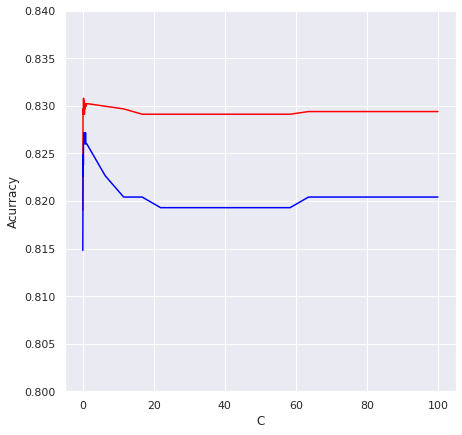

In [21]:
plt.figure(figsize=(7,7))
plt.plot(params, np.mean(train_score,1), color='red')
plt.plot(params, np.mean(test_score,1), color='blue')
plt.xlabel('C')
plt.ylabel('Acurracy')
plt.ylim(0.8,0.84)

In [22]:
N, train_score, test_score=learning_curve(model,X,y, train_sizes=np.linspace(0.1,1,25), cv=7, scoring='accuracy', n_jobs=-1)

Text(0, 0.5, 'Acurracy')

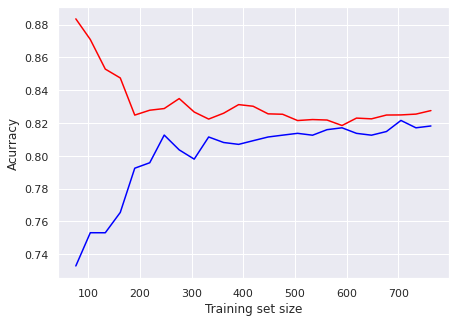

In [23]:
plt.figure(figsize=(7,5))
plt.plot(N,np.mean(train_score,1), color='red')
plt.plot(N,np.mean(test_score,1), color='blue')
plt.xlabel('Training set size')
plt.ylabel('Acurracy')

#Problema 2: 
Usar Sklearn para implementar el modelo de regresión lineal (usar la ecuacion normal y Gradiente Estocástico) en el Dataset ***FuelConsumption.csv*** para predecir la emisión de CO2 de algunos autos basado en algunas de sus características.

Recuerde que en sklearn puede implementar el gradiente de descenso importando:

`from sklearn.linear_model import SGDRegressor`

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [25]:
data = pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/FuelConsumption.csv')

In [26]:
data.shape

(1067, 13)

In [27]:
data.isnull().any()

MODELYEAR                   False
MAKE                        False
MODEL                       False
VEHICLECLASS                False
ENGINESIZE                  False
CYLINDERS                   False
TRANSMISSION                False
FUELTYPE                    False
FUELCONSUMPTION_CITY        False
FUELCONSUMPTION_HWY         False
FUELCONSUMPTION_COMB        False
FUELCONSUMPTION_COMB_MPG    False
CO2EMISSIONS                False
dtype: bool

In [28]:
data.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
998,2014,TOYOTA,TACOMA,PICKUP TRUCK - SMALL,4.0,6,M6,X,14.5,11.3,13.1,22,301
989,2014,TOYOTA,PRIUS v,STATION WAGON - MID-SIZE,1.8,4,AV,X,5.3,5.8,5.5,51,126
984,2014,TOYOTA,HIGHLANDER AWD,SUV - STANDARD,3.5,6,AS6,X,13.0,9.7,11.5,25,264
25,2014,AUDI,A6 QUATTRO,MID-SIZE,2.0,4,AS8,Z,12.0,8.1,10.2,28,235
863,2014,NISSAN,XTERRA 4WD,SUV - SMALL,4.0,6,A5,X,16.1,11.9,14.2,20,327


In [29]:
X=data.loc[:,['ENGINESIZE','FUELTYPE','FUELCONSUMPTION_CITY']]
y = data['CO2EMISSIONS']

In [30]:
X=pd.get_dummies(X, drop_first=True)

In [31]:
X.head()

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2.0,9.9,0,0,1
1,2.4,11.2,0,0,1
2,1.5,6.0,0,0,1
3,3.5,12.7,0,0,1
4,3.5,12.1,0,0,1


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

In [34]:
X_train.shape

(853, 5)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [36]:
model = Pipeline((
      ('scale', StandardScaler()),  ('poly', PolynomialFeatures(degree=2)), ('linear_regression', LinearRegression() )
))

In [37]:
model.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('poly', PolynomialFeatures()),
                ('linear_regression', LinearRegression())])

In [38]:
y_fit=model.predict(X_test)
r2_score(y_test,y_fit)

0.9905292971987586

In [39]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import validation_curve

In [40]:
model = Pipeline((
      ('scale', StandardScaler()),  ('poly', PolynomialFeatures(degree=2)), ('SGD', SGDRegressor(max_iter=1000, penalty=None))
 ))

In [41]:
params=np.arange(1,100)
#train_score, val_score=validation_curve(model, X_train, y_train, 'SGD__max_iter', params, cv=3, n_jobs=-1)
#train_score, val_score=validation_curve(model, X_train, y_train, 'SGD__max_iter', params, cv=5, n_jobs=-1)
train_score, val_score = validation_curve(
  model,
  X_train, 
  y_train,
  param_name='SGD__max_iter',
  param_range=params,
  cv=5, 
  n_jobs=-1
)

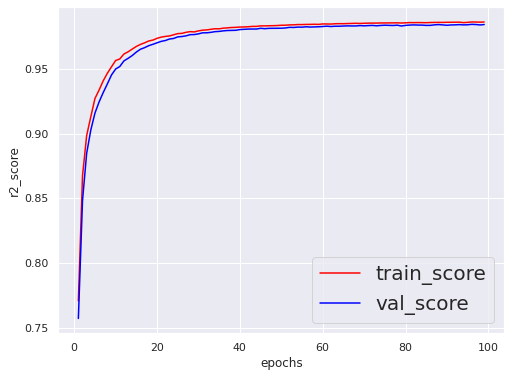

In [42]:
plt.figure(figsize=(8,6))
plt.plot(params, np.mean(train_score,1), color='red',label='train_score')
plt.plot(params, np.mean(val_score,1), color='blue', label='val_score')
plt.legend( fontsize=20)
plt.xlabel('epochs')
plt.ylabel('r2_score');

In [43]:
model.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('poly', PolynomialFeatures()),
                ('SGD', SGDRegressor(penalty=None))])

In [44]:
y_fit=model.predict(X_test)
r2_score(y_test,y_fit)

0.9900093367415395

In [45]:
#generemos la función de coste cualquiera
import numpy as np
costo = lambda w: np.sin(1/2 * w[0]**2 - 1/4 * w[1]**2 + 3) * np.cos(2*w[0] - np.e**w[1]) #w[0] será el bias

costo([1,2])

0.374762046993176

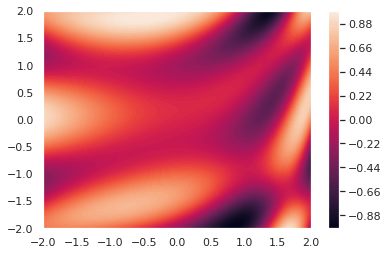

In [46]:
import matplotlib.pyplot as plt

# veamos su forma:
N = 100
x = np.linspace(-2,2,N)
y = np.linspace(-2,2,N)
z = np.zeros((N,N))

for i,xi in enumerate(x):
  for j,yj in enumerate(y):
    z[i,j] = costo([xi,yj])
  
plt.contourf(x,y,z,100)
plt.colorbar()
plt.show()


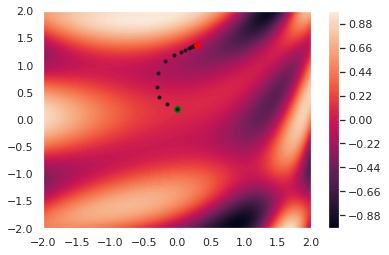

In [47]:
plt.contourf(x,y,z,100)
plt.colorbar()
np.random.seed(6)

Ws = np.random.rand(2) * 2 - 1
Ws = [0,0.2]
Wc = np.copy(Ws)
h = 0.01
alpha = 0.005
grad = np.zeros(2)

plt.plot(Ws[0],Ws[1],'o',c='green')


for _ in range(100000): #numero de iteraciones que harémos
  for it, w in enumerate(Ws):
    Wc = np.copy(Ws)
    Wc[it] = Wc[it] + h
    derivada = (costo(Wc) -costo (Ws))/h #derivada parcial por diferencias mínimas
    grad[it] = derivada
    
  Ws = Ws - alpha * grad
  
  if _%100 == 0:
    plt.plot(Ws[0],Ws[1], 'k.')
    
plt.plot(Ws[0],Ws[1],'o',c='red')

###Ejercicio

Con los siguientes vector, escalar y los datos de entrada de la compuerta lógica **AND**, escribir una función que regrese las salidas correctas, usando un perceptrón. 

$W =
 \begin{pmatrix}
  1  \\
  1 \\
 \end{pmatrix}$

$B=-1.5$

In [ ]:
import numpy as np

def And(X,W,B):
  X1=np.heaviside(np.dot(X,W)+B,1)
  return(X1)
  
X=np.array([[0,0],[0,1],[1,0],[1,1]])
W=np.array([1,1])
B=-1.5
y=And(X,W,B)
print(y)

[0. 0. 0. 1.]


# Problema 

Implementar un modelo de red neuronal usando Keras para predecir los sobrevivientes del titanic. El modelo debe tener dos capas ocultas densas con 16 neuronas cada una y funcion de activacion relu. como optimizador usar descenso del gradiente estocástico como función de pérdida usar binary_crossentropy y como métrica usar accuracy. 

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [77]:
data = pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/titanic.csv')

Inspeccionamos un poco el dataset

In [78]:
data.shape

(891, 12)

In [79]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [80]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
214,215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q
847,848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C


In [81]:
data.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis=1, inplace=True)

In [82]:
data.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
268,1,1,female,58.0,0,1,153.4625
44,1,3,female,19.0,0,0,7.8792
80,0,3,male,22.0,0,0,9.0000
46,0,3,male,NaN,1,0,15.5000
758,0,3,male,34.0,0,0,8.0500


In [83]:
from sklearn.impute import SimpleImputer

In [84]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [85]:
data.loc[data['Survived']==1,['Age']]=imp.fit_transform(data.loc[data['Survived']==1,['Age']])
data.loc[data['Survived']==0,['Age']]=imp.fit_transform(data.loc[data['Survived']==0,['Age']])

In [86]:
data.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
dtype: bool

In [87]:
data=pd.get_dummies(data)

In [88]:
data['Family_size']=data['SibSp'] + data['Parch']
data.drop(['SibSp', 'Parch'] ,axis=1, inplace=True)
data.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Family_size
0,0,3,22.0,7.2500,0,1,1
1,1,1,38.0,71.2833,1,0,1
2,1,3,26.0,7.9250,1,0,0
3,1,1,35.0,53.1000,1,0,1
4,0,3,35.0,8.0500,0,1,0


In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0],test_size = 0.2, random_state=0)

In [91]:
X_train.shape

(712, 6)

In [92]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
X_train_scaled.shape

(712, 6)

In [94]:
from tensorflow import keras

In [95]:
keras.backend.clear_session()

In [96]:
model = keras.models.Sequential([
                                 keras.layers.Dense(16,activation='relu', input_shape=(6,)),
                                 keras.layers.Dense(16,activation='relu'),
                                 keras.layers.Dense(1, activation='sigmoid')
])

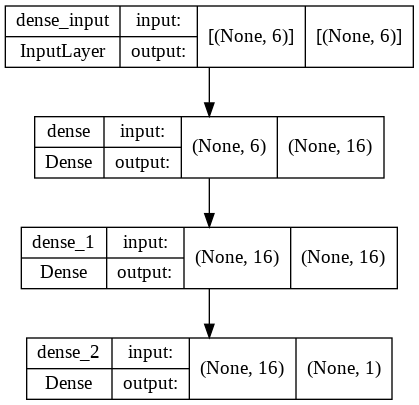

In [97]:
keras.utils.plot_model(model, show_shapes=True)

In [98]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [99]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [100]:
history=model.fit(X_train_scaled,y_train, epochs=50, validation_split=0.2)

Epoch 1/50
18/18 [==============================] - 1s 12ms/step - loss: 0.6939 - accuracy: 0.5501 - val_loss: 0.6760 - val_accuracy: 0.6294
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6639 - accuracy: 0.6415 - val_loss: 0.6504 - val_accuracy: 0.6713
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6380 - accuracy: 0.7065 - val_loss: 0.6284 - val_accuracy: 0.7483
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 0.6151 - accuracy: 0.7434 - val_loss: 0.6084 - val_accuracy: 0.7692
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.5951 - accuracy: 0.7698 - val_loss: 0.5922 - val_accuracy: 0.7622
Epoch 6/50
18/18 [==============================] - 0s 3ms/step - loss: 0.5778 - accuracy: 0.7786 - val_loss: 0.5775 - val_accuracy: 0.7762
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.5623 - accuracy: 0.7873 - val_loss: 0.5641 - val_accuracy: 0.7972
Epoch 8/50
18/18 [=

In [101]:
model.evaluate(X_test_scaled,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8045


[0.41190657019615173, 0.8044692873954773]

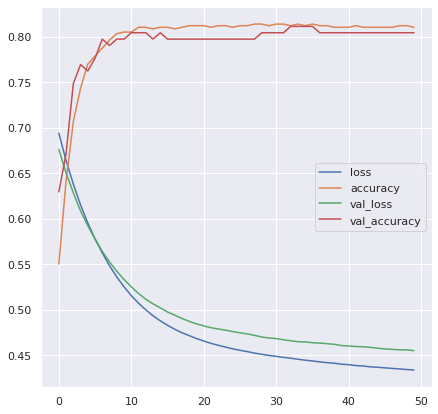

In [102]:
pd.DataFrame(history.history).plot(figsize=(7,7))